In [51]:
# Chips

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

chips_path = r"C:\Users\verci\Downloads\pokerchips.csv"
chips_file = pd.read_csv(chips_path)
print(chips_file)
chips_file = chips_file.dropna()

def science_plot(fontsize = 11):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()


    trial  size  unbiased  3 biased  5 biased  7 biased  10 biased
0       1    20        15        11        14        13         17
1       2    20         6        12        15        14         17
2       3    20        13        13        15        13         18
3       4    20         9        13        10        15         14
4       5    20         9        13        14        14         19
..    ...   ...       ...       ...       ...       ...        ...
95     96    20        13        10        15        17         13
96     97    20        14        13        11        14         16
97     98    20         7        12        10        13         14
98     99    20        12        17         9        15         17
99    100    20        11        14        14        13         13

[100 rows x 7 columns]


In [52]:
import math
import scipy.stats as stats
# Function to compute the binomial PMF
def binomial_pmf(k, n, p):
    import math
    return np.array([math.comb(n, ki) * (p ** ki) * ((1 - p) ** (n - ki)) for ki in k])

def biased_coin_pmf(n, b, p):
    """Returns the probability mass function for biased coin tosses."""
    k = np.arange(b, n+1)  # Possible outcomes (at least b heads)
    pmf = stats.binom.pmf(k-b, n-b, p)  # Shifted binomial distribution
    return k, pmf

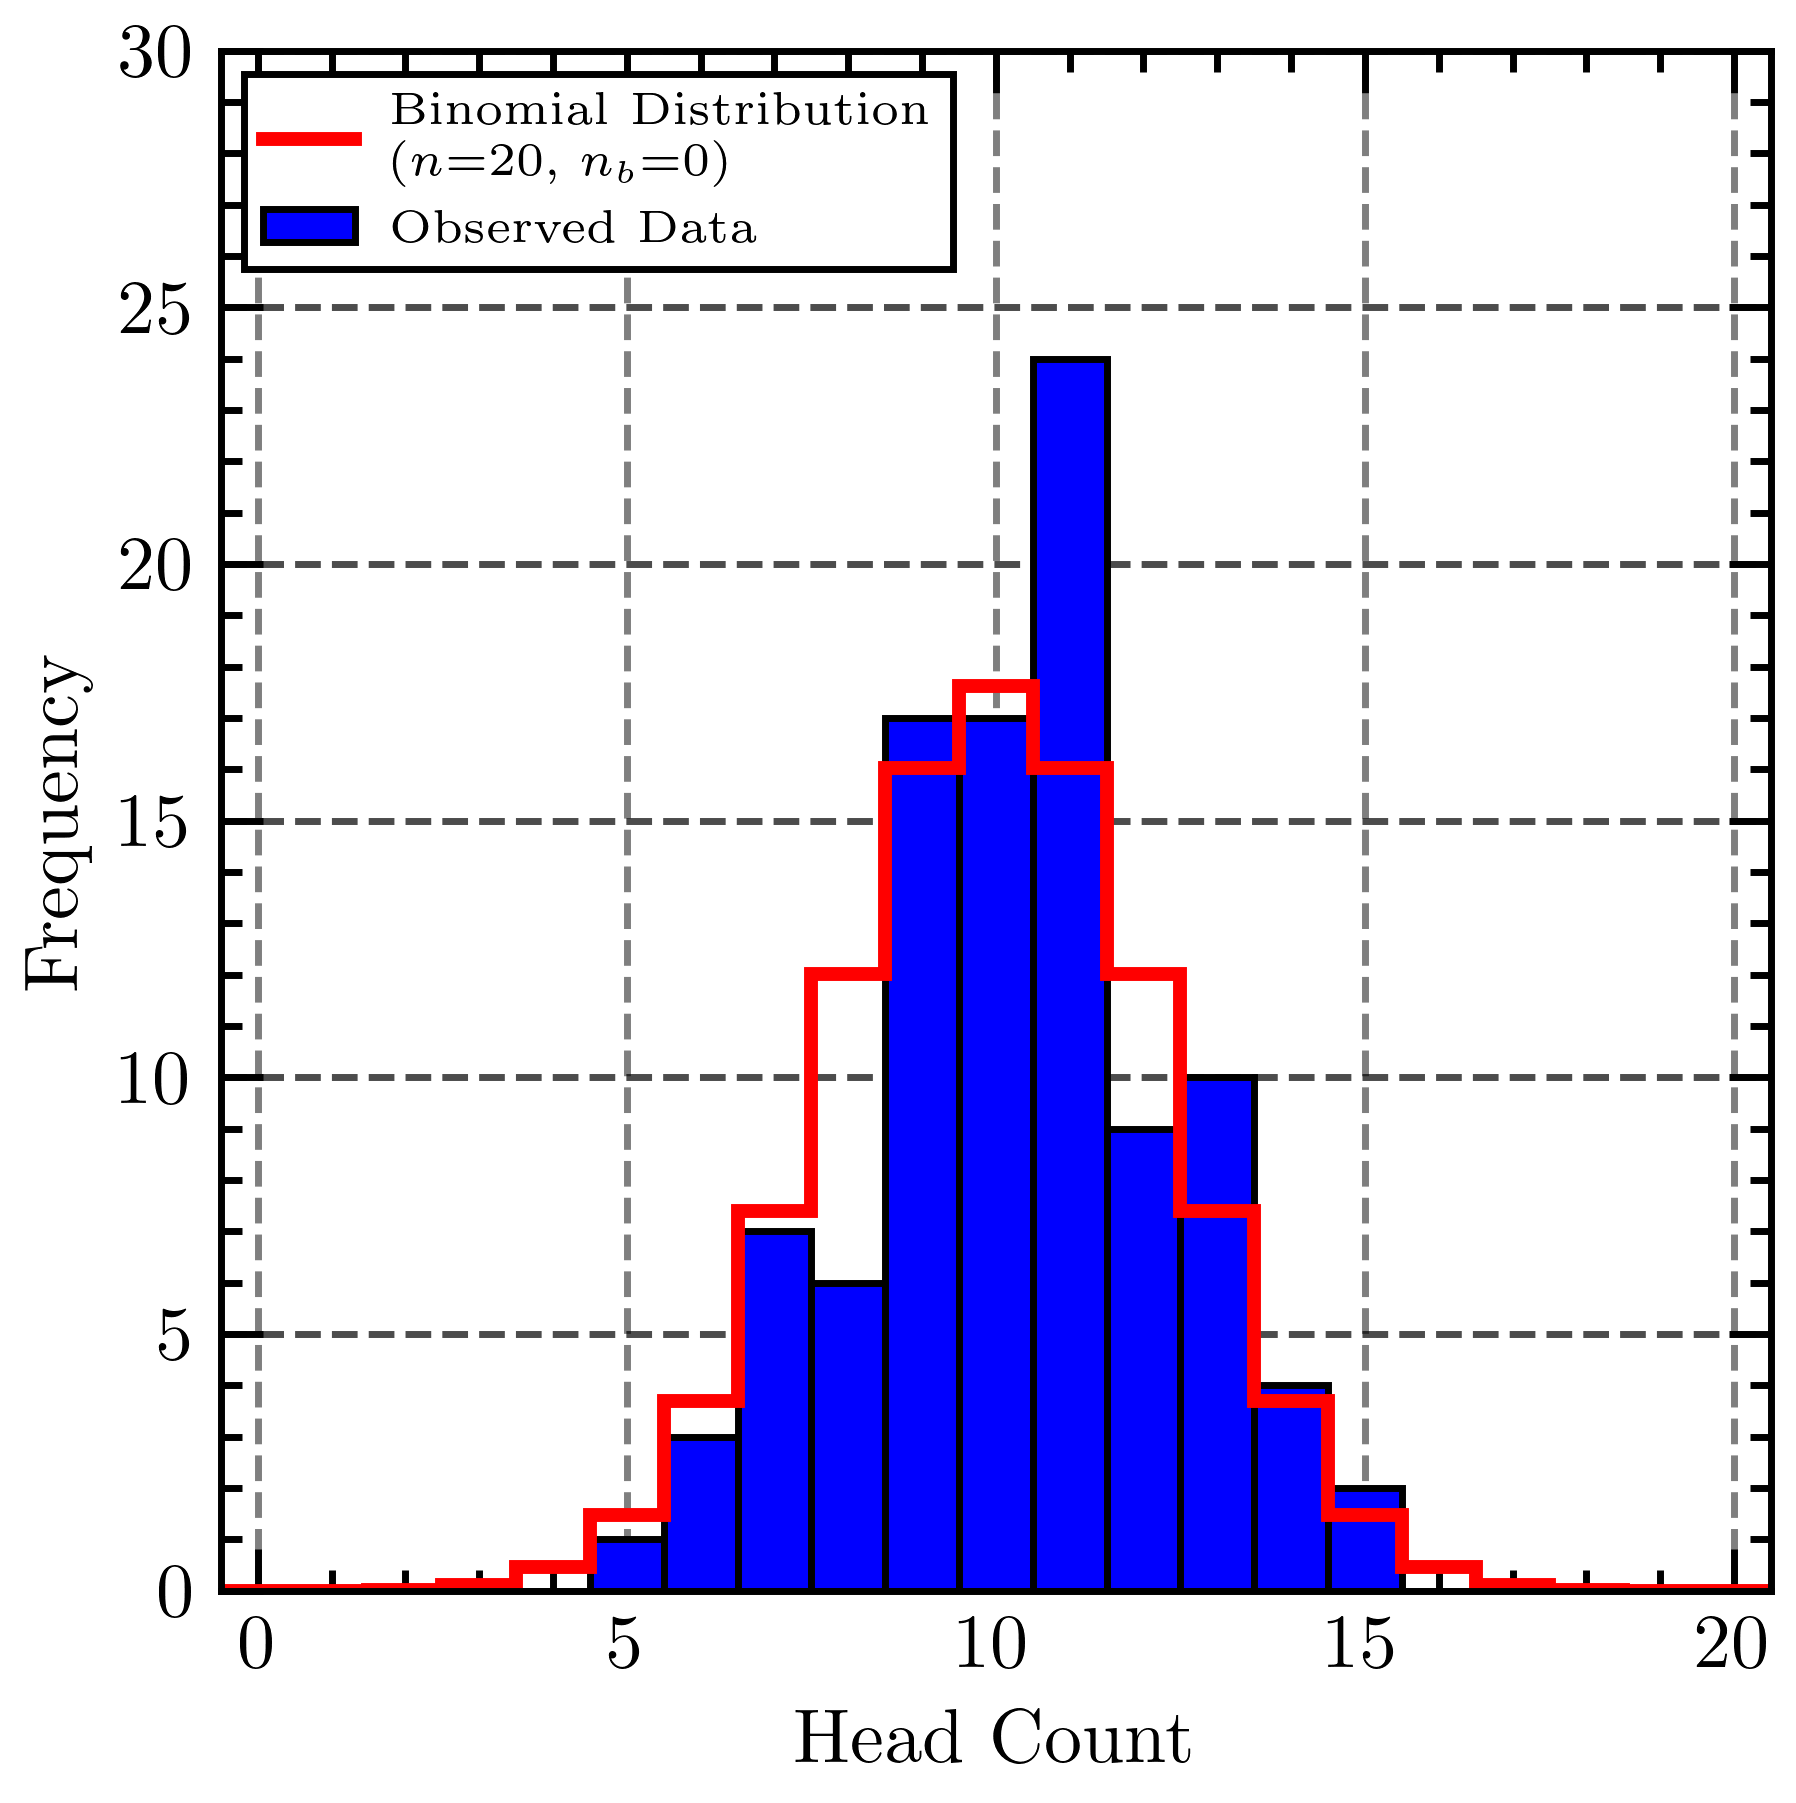

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def biased_coin_pmf(n, b, p):
    """Returns the probability mass function for biased coin tosses."""
    k = np.arange(b, n + 1)  # Possible outcomes (at least b heads)
    pmf = stats.binom.pmf(k - b, n - b, p)  # Shifted binomial distribution
    return k, pmf

def grapher(column_name, n_bias, figsize, propsize):
    """Plots a histogram of observed data with a binomial PMF overlay."""
    global chips_file  # Ensure chips_file is defined globally
    
    # Drop NaN values and compute frequency counts
    bins = np.arange(0, 21)  # Integer bins from 0 to 20
    frequency = chips_file[column_name].value_counts().reindex(bins, fill_value=0)  

    # Compute binomial PMF for comparison
    n_trials = 20  # Total coin tosses
    bias_probs = biased_coin_pmf(n_trials, n_bias, 0.5)[1]  
    bias_probs_n = np.concatenate([np.zeros(n_bias, dtype=int), bias_probs])  

    # Scale PMF to match observed data
    binom_scaled = bias_probs_n * frequency.sum()  

    # Plot histogram
    plt.figure(figsize=figsize, dpi=500)
    plt.bar(frequency.index, frequency.values, color='b', edgecolor='black', width=1, 
            zorder=1, label="Observed Data")

    # Overlay binomial PMF
    plt.stairs(binom_scaled, np.arange(0, 22) - 0.5, color='r', 
               label=f"Binomial Distribution \n ($n$=20, $n_b$={n_bias})", 
               zorder=2, linewidth=2)

    # Labels and title
    plt.xlabel('Head Count')
    plt.ylabel("Frequency")
    max_y = 30
    plt.ylim(0, max_y)
    plt.xlim(-0.5, 20.5)
    plt.xticks(range(0, 25, 5))
    plt.yticks(range(0, max_y + 5, 5))

    # Legend
    plt.legend(loc="upper left", prop={'size': propsize})  

    # Optional annotations (commented out but formatted)
    # plt.annotate('Observed Data', xy=(10, 20), xytext=(0.5, 22),
    #              arrowprops=dict(facecolor='black', shrink=0.001, width=0.5, headwidth=2),
    #              bbox=dict(boxstyle='square,pad=0.5', facecolor='white', edgecolor='black', alpha=1),
    #              fontsize=8)
    # plt.annotate(f"Binomial Distribution \n ($n$=20, $p$={p_success})", xy=(10, 20), xytext=(0.5, 15),
    #              arrowprops=dict(facecolor='black', shrink=0.001, width=0.5, headwidth=2),
    #              bbox=dict(boxstyle='square,pad=0.5', facecolor='white', edgecolor='black', alpha=1),
    #              fontsize=8)

    plt.grid(axis="y", linestyle="--", alpha=0.7, zorder=0)
    plt.show()

# Example Call (Assuming `chips_file` is defined)
s = 4/3
grapher('unbiased', 0, (3*s, 3*s), 5*s)


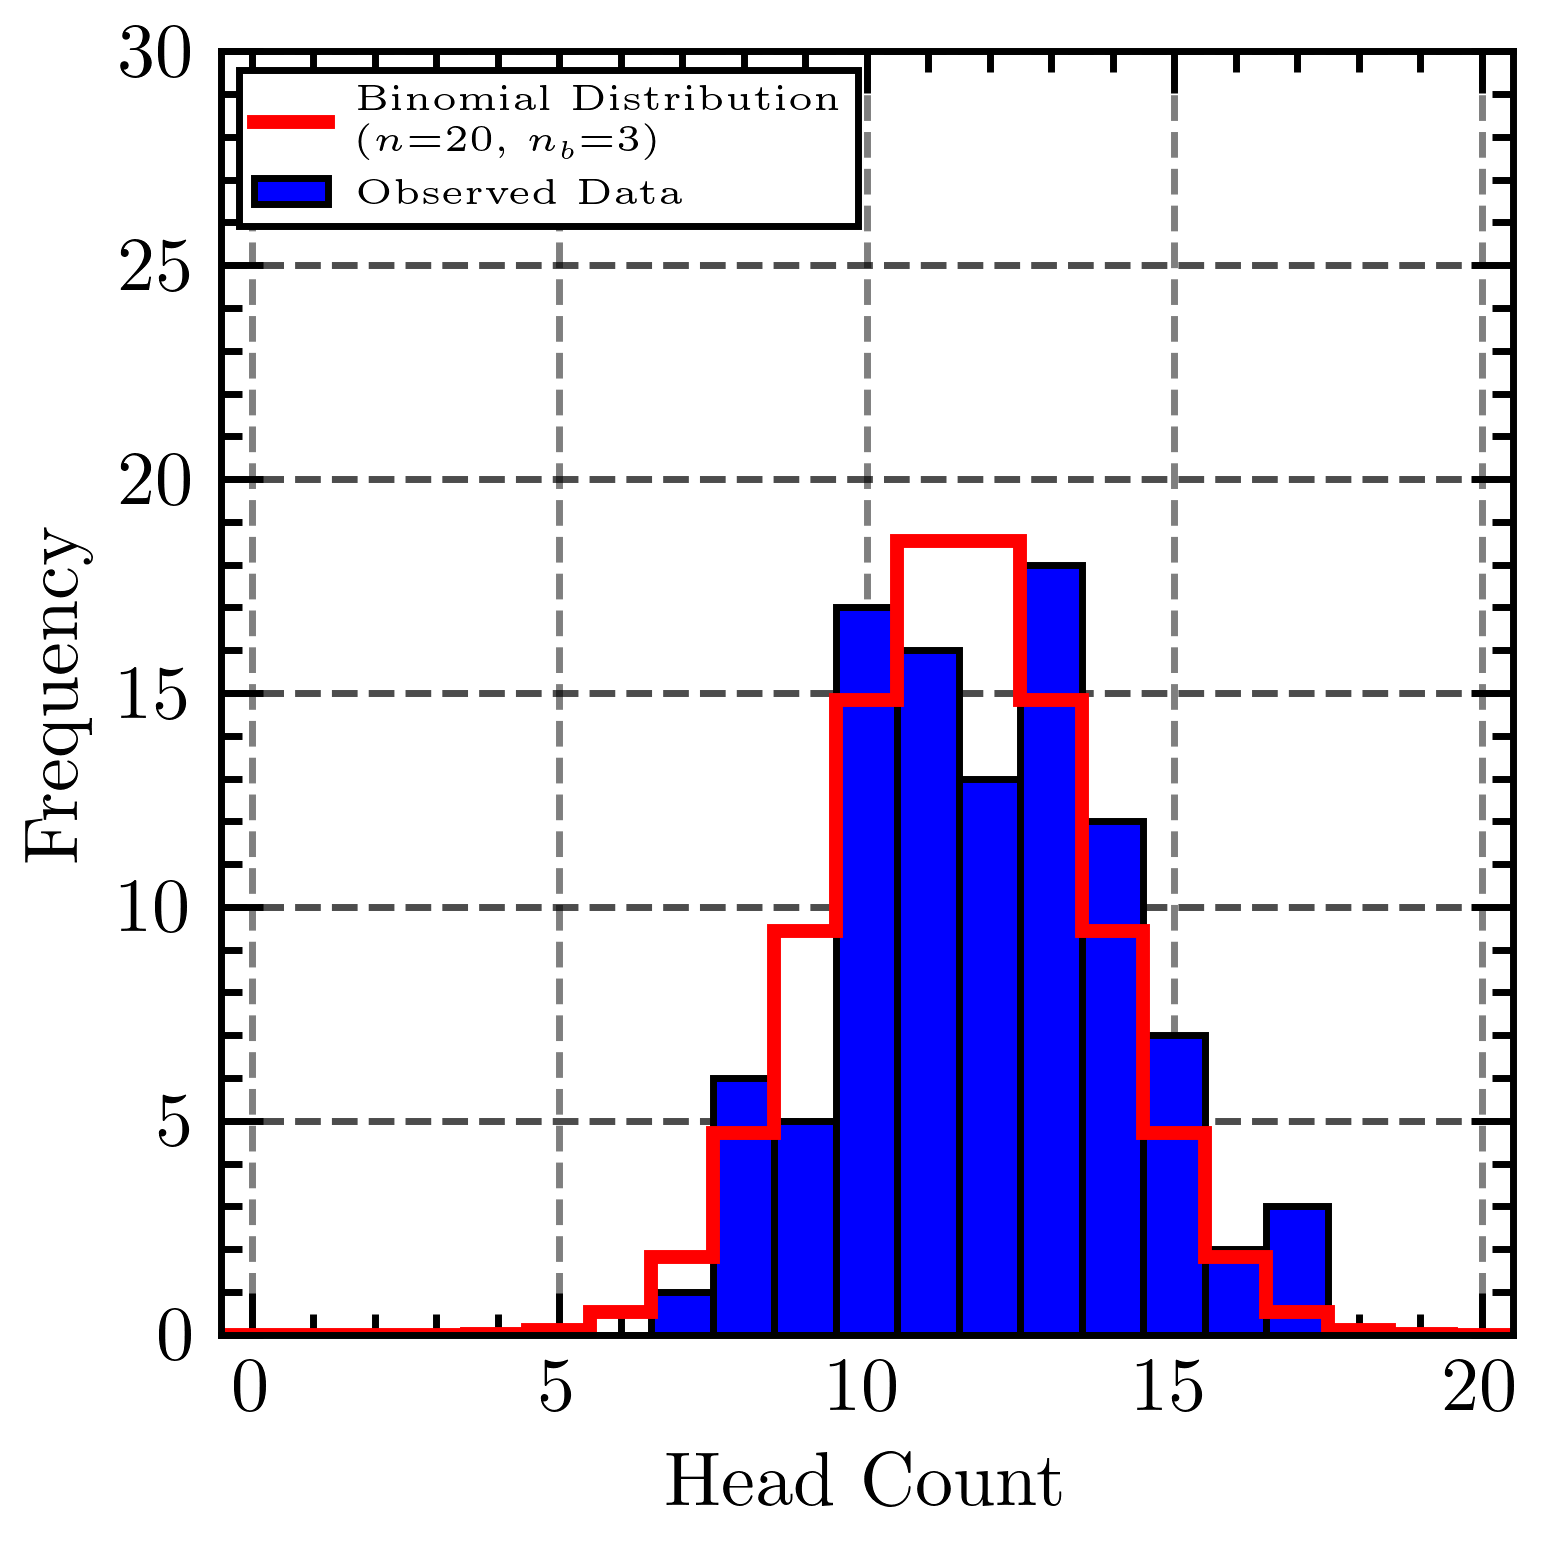

In [53]:
grapher('3 biased', 3, (2.5*s, 2.5*s),4*s)

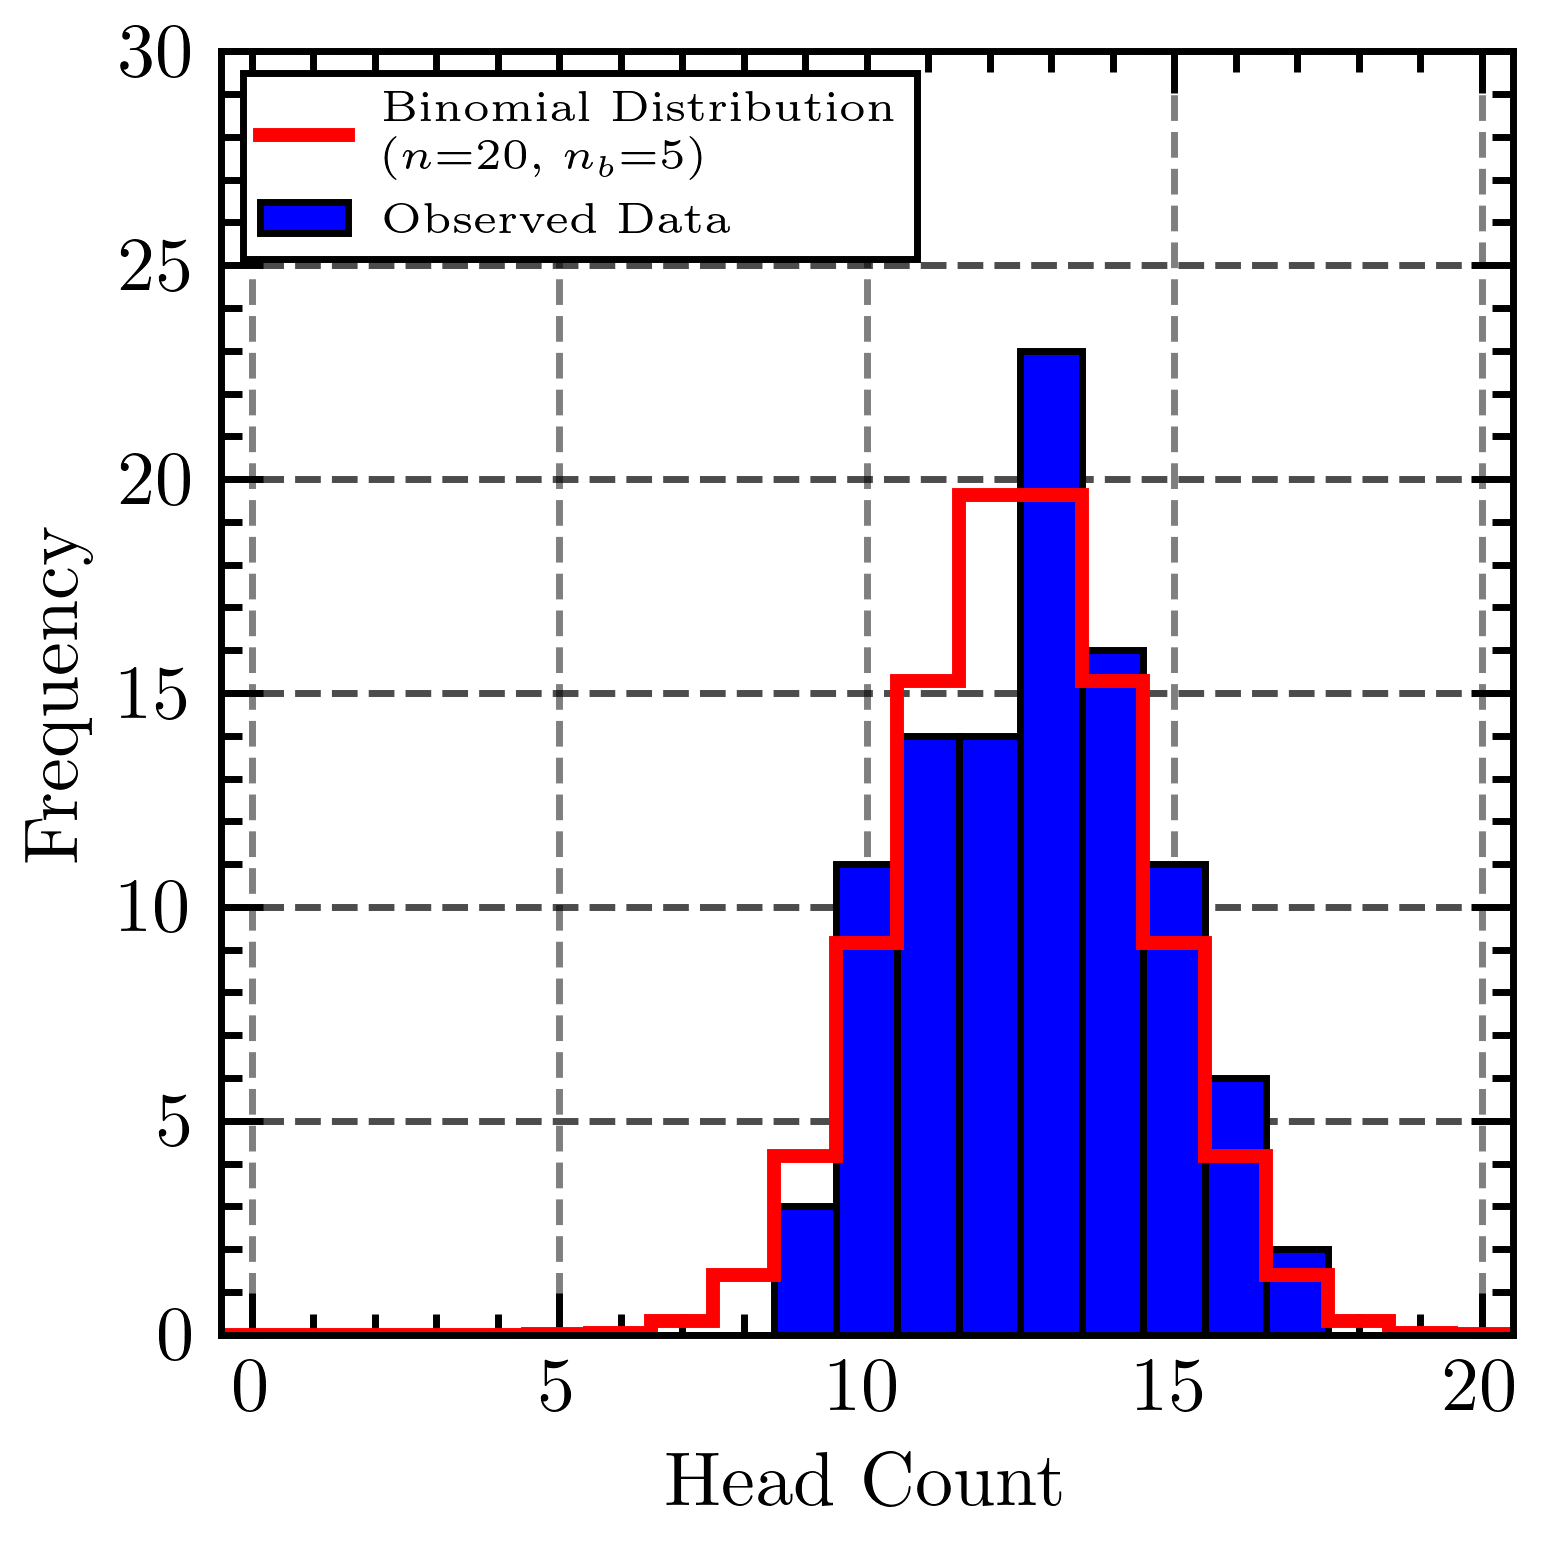

In [54]:
grapher('5 biased',5, (2.5*s, 2.5*s),4.75*s)

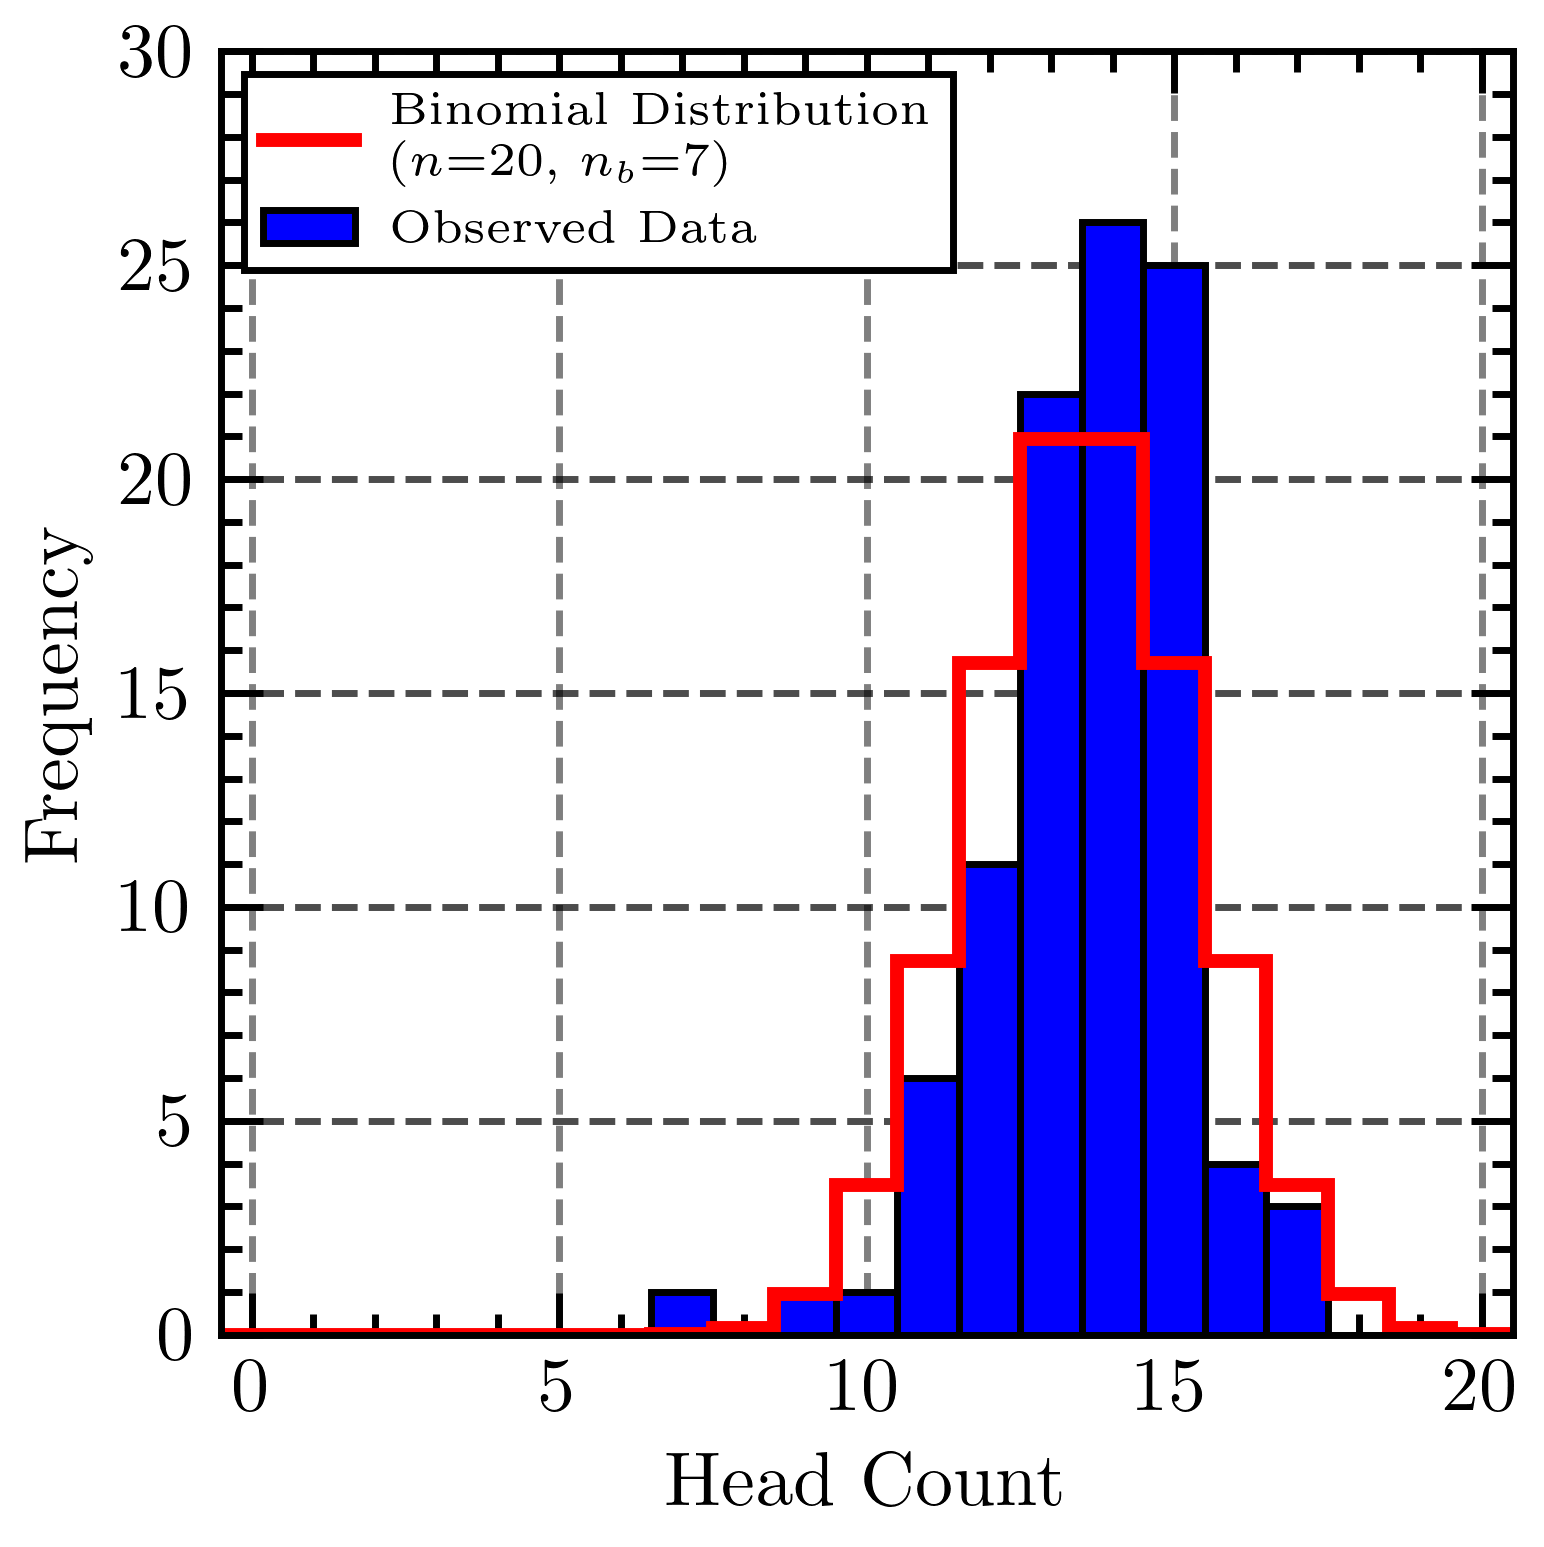

In [55]:
grapher('7 biased',7, (2.5*s, 2.5*s),5*s)

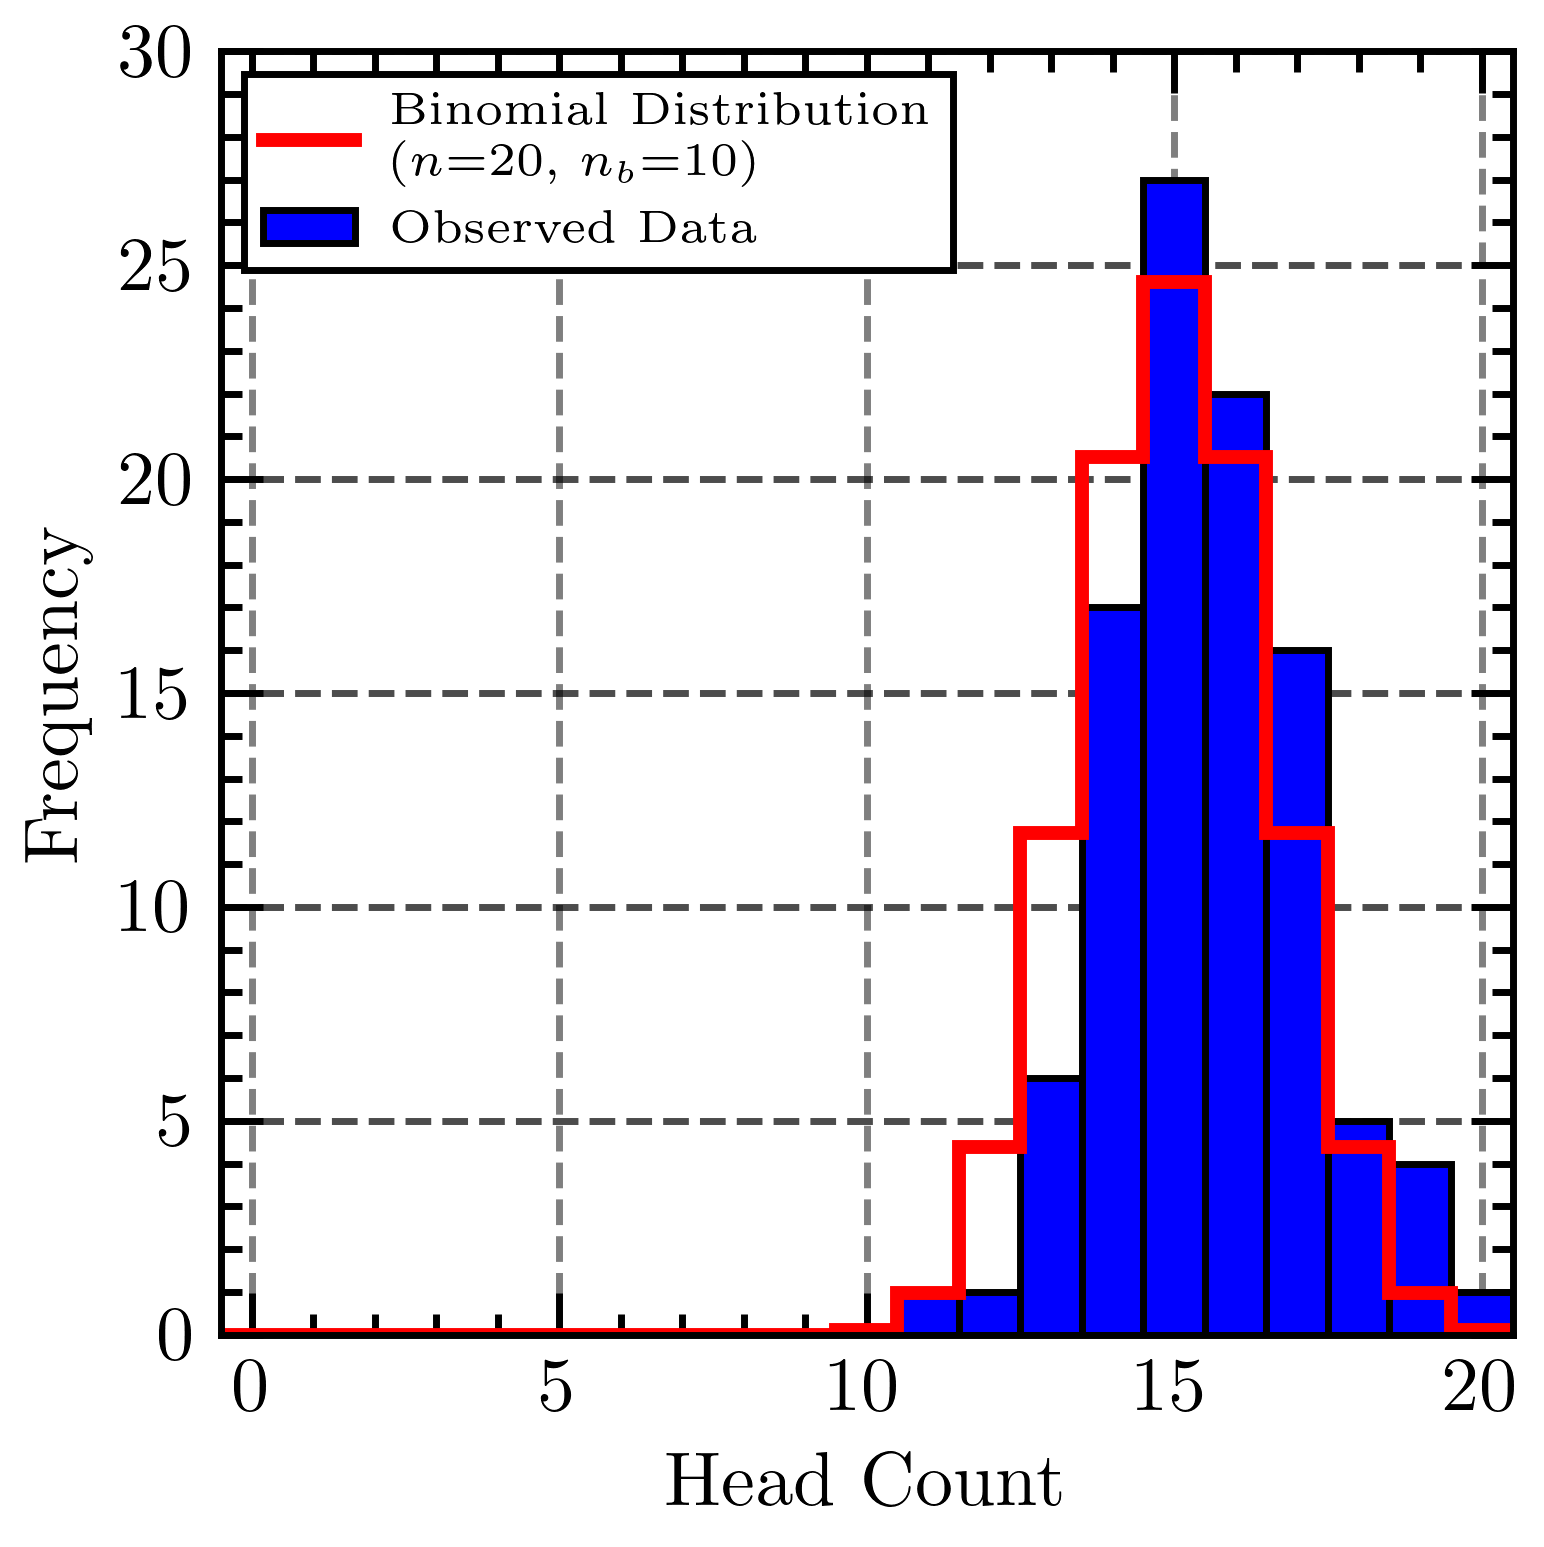

In [56]:
grapher('10 biased',10, (2.5*s, 2.5*s),5*s)

In [57]:
# print(chips_file)

# Calculate mean and standard deviation for each biased column
biased_columns = ['unbiased', '3 biased', '5 biased', '7 biased', '10 biased']
means = chips_file[biased_columns].mean()
std_devs = chips_file[biased_columns].std()

# Create a new DataFrame for the results
bias_df = pd.DataFrame({
    'biased': biased_columns,
    'mean': means,
    'stdev': std_devs,
    'mean_xp': [10,11.5,12.5,13.5,15],
    'std_xp':[np.sqrt(20*(0.5)**2),np.sqrt(17*(0.5)**2),np.sqrt(15*(0.5)**2),np.sqrt(13*(0.5)**2),np.sqrt(10*(0.5)**2)]
})
bias_df['n_bias'] = [0, 3, 5, 7, 10]
# # Reset the index to match your desired format
bias_df.reset_index(drop=True, inplace=True)

# Display the result
print(bias_df)



      biased   mean     stdev  mean_xp    std_xp  n_bias
0   unbiased  10.31  2.087457     10.0  2.236068       0
1   3 biased  11.92  2.214187     11.5  2.061553       3
2   5 biased  12.77  1.900850     12.5  1.936492       5
3   7 biased  13.64  1.636207     13.5  1.802776       7
4  10 biased  15.54  1.610697     15.0  1.581139      10


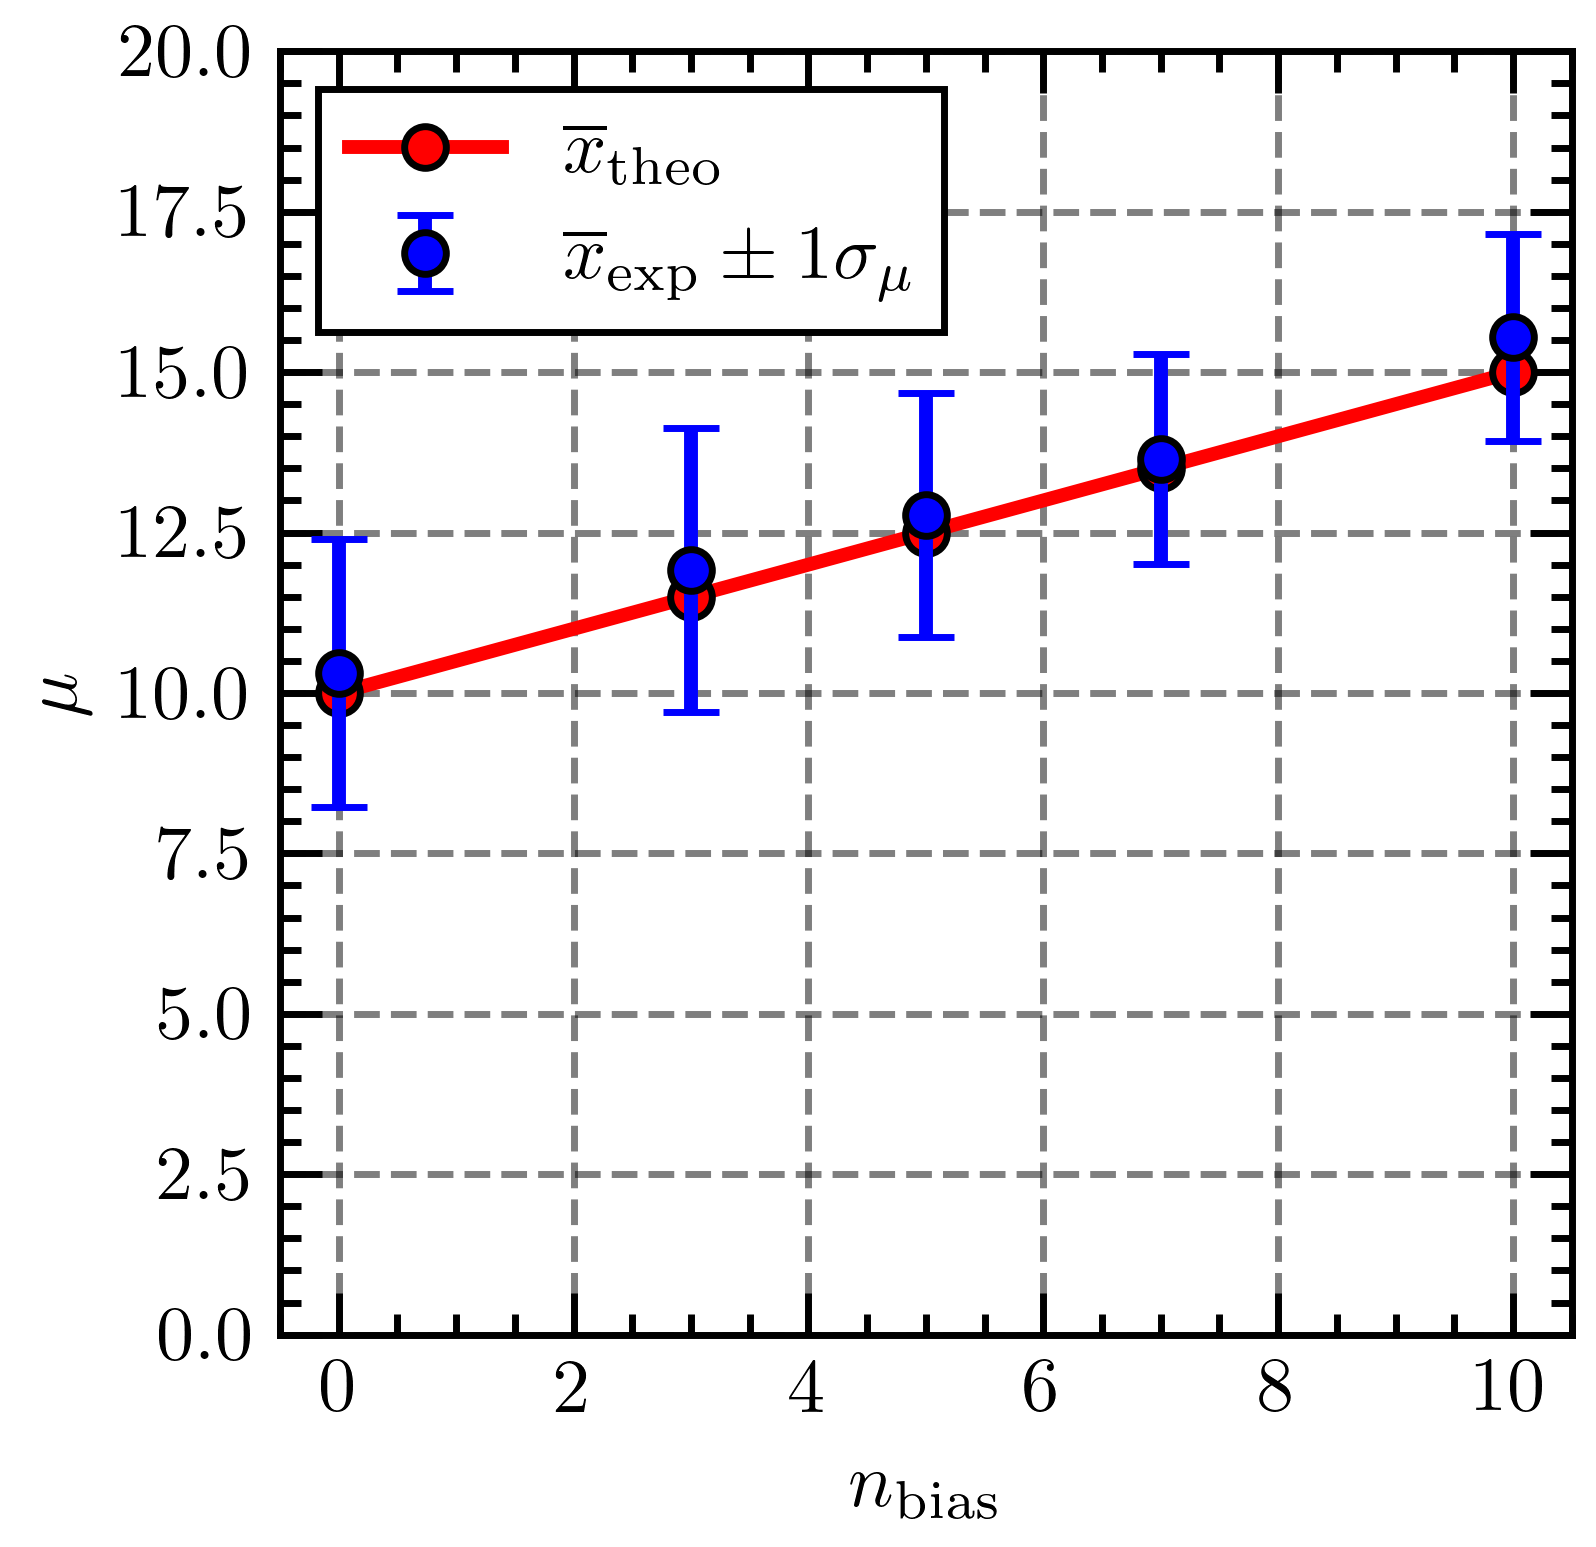

In [58]:
x = np.array(bias_df['n_bias'])

n = 20
p = 0.5 
y_theo = [(b+(n-b)*p) for b in x]
y_expr = np.array(bias_df['mean'])
y_std =  np.array(bias_df['stdev'])

plt.figure(figsize = (2.5*4/3,2.5*4/3), dpi = 500)
plt.plot(x, y_theo, color = 'r', markerfacecolor = 'r',marker = 'o', markeredgecolor = 'k', label = r'$\overline{x}_\text{theo}$', )
plt.errorbar(x,y_expr,y_std, color = 'b', markeredgecolor = 'k', fmt='o', capsize=4, label = r'$\overline{x}_\text{exp}\pm 1\sigma_\mu$')
plt.xlim(-0.5,10.5)
plt.ylim(0,20)
plt.ylabel(r'$\mu$')
plt.xlabel(r'$n_\text{bias}$')
plt.xticks(range(0,12,2))
plt.legend()
plt.show()


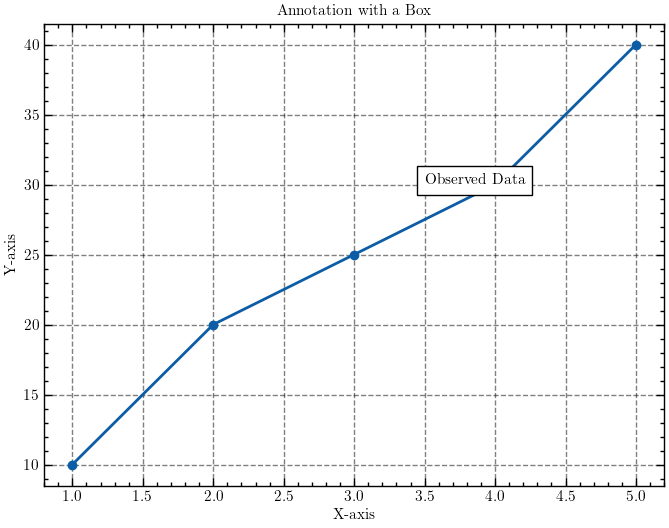

In [59]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]

# Plot the data
plt.plot(x, y, marker='o', label='Data')

# Add an annotation with a box
plt.annotate('Observed Data', xy=(3, 25), xytext=(3.5, 30),
             bbox=dict(boxstyle='square,pad=0.5', facecolor='white', edgecolor='black', alpha=1))

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Annotation with a Box')

# Show the plot
plt.show()

In [60]:
# Montecarloing the fucker
N = 100
n = 20
p_q = 0.75
head_list = np.zeros(N, dtype=int)
for i in range(N):
    coin_list = np.zeros(n, dtype=int)
    for j in range(20):
        coin_list[j] = np.random.choice([0,1],p = [1-p_q,p_q])
    head_list[i]=np.sum(coin_list)
print(head_list)
chips_file['unbiased_mc'] = head_list
print(chips_file)
grapher('unbiased_mc',p_q)

[14 17 13 17 12 17 13 14 16 12 14 15 15 17 17 16 16 15 18 15 16 18 13 17
 16 15 16 10 14 11 15 17 15 14 13 14 13 18 15 17 14 18 15 17 10 11 18 18
 18 16 19 14 13 16 17 17 15 14 14 15 16 17 16 14 14 17 14 18 15 15 15 14
 16 16 12 15 15 17 13 16 16 17 17 13 15 15 13 14 11 15 17 18 16 15 17 15
 12 13 14 13]
    trial  size  unbiased  3 biased  5 biased  7 biased  10 biased  \
0       1    20        15        11        14        13         17   
1       2    20         6        12        15        14         17   
2       3    20        13        13        15        13         18   
3       4    20         9        13        10        15         14   
4       5    20         9        13        14        14         19   
..    ...   ...       ...       ...       ...       ...        ...   
95     96    20        13        10        15        17         13   
96     97    20        14        13        11        14         16   
97     98    20         7        12        10        13         

TypeError: grapher() missing 2 required positional arguments: 'figsize' and 'propsize'

In [ ]:
def fact(n):
    if n < 0:
        raise ValueError("n must be non-negative")
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result
def choose(n, k):
    if k > n:
        raise ValueError("k must not be greater than n")
    return fact(n) / (fact(k) * fact(n - k))

# Biased binomial
def binomial_pmf(n, p, k = 0, scale = 1, array = True, cdf = False, stat = False):
    """
    Computes the probability mass function (PMF) of the binomial distribution.

    Parameters:
    -----------
    n : int
        The number of trials.
    p : float
        The probability of success in each trial.
    k : int, optional (default=0)
        The number of successful events. Ignored if `array=True` or `cdf=True`.
    scale : float, optional (default=1)
        A scaling factor applied to the probability.
    array : bool, optional (default=True)
        If True, returns the PMF for all values of k (0 to n).
    cdf : bool, optional (default=False)
        If True, returns the k values and cumulative distribution function (CDF).
    stat : bool, optional (default=False)
        If True, returns statistical properties of the binomial distribution. Overrides cmf and cdf

    Returns:
    --------
    - If `array` is True: Returns two arrays (k values and PMF values).
    - If `cdf` is True: Returns two arrays of k and  cumulative probabilities.
    - If `stat` is True: Returns a tuple (PMF, dictionary of statistics).
    - Otherwise: Returns the probability mass function for a single `k`.

    Raises:
    -------
    ValueError:
        - If `n` or `k` are negative.
        - If `k` is greater than `n`.
        - If `p` is greater than 1

    Notes:
    ------
    - Uses a custom factorial and combination function.
    - The binomial PMF is given by:

      .. math::
         P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k}
    """

    if p > 1 or p < 0:
        raise ValueError('p cannot be greater than 1 or lesser than 0')
    q = 1 - p  # Probability of failure
    k_vals = np.arange(0, n + 1)
    pmf_vals = np.array([choose(n, k) * p**k * q**(n - k) * scale for k in k_vals])
    if stat:
        stats = {
            "mean": n * p,
            "variance": n * p * q,
            "standard deviation": np.sqrt(n * p * q),
            "skewness": (q - p) / np.sqrt(n * p * q),
            "kurtosis": (1 - 6 * p * q) / (n * p * q) if n * p * q > 0 else float("inf"),
            'total area': np.sum(pmf_vals)
        }
        stats = pd.DataFrame.from_dict(stats, orient="index", columns=["Value"])
        return stats
    if array or cdf:
        if cdf:
            return k_vals, np.cumsum(pmf_vals)
        return k_vals, pmf_vals
    pmf = choose(n, k) * p**k * q**(n - k) * scale
    return pmf
def P_biased(b, n):
    k_vals = np.arange(0, n + 1)
    counts = np.array([choose(n-b, k-b) * 0.5**(n-b) for k in k_vals])
    return k_vals, counts 

nonbiased_x, nonbiased_y = binomial_pmf(20, 0.75)
biased_x, biased_y = P_biased(10, 20)

plt.bar(nonbiased_x, nonbiased_y, color = 'r')
plt.bar(biased_x, biased_y, color = 'b')
plt.show()